In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from config import IEX_API_Key

%matplotlib inline

tickers = [
    'JPM',
    'MS',
    'WFC',
    'GS',
]

ticker_string =''

for ticker in tickers:
    ticker_string += ticker
    ticker_string += ','

ticker_string = ticker_string[:-1]

endpoints = 'chart'
years = '10'

HTTP_request = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={ticker_string}&types={endpoints}&range={years}y&token={IEX_API_Key}'

bank_data = pd.read_json(HTTP_request)

series_list = []

for ticker in tickers:
    series_list.append(pd.DataFrame(bank_data[ticker]['chart'])['close'])

series_list.append(pd.DataFrame(bank_data[ticker]['chart'])['date'])

column_names = tickers.copy()
column_names.append('Date')

bank_data = pd.concat(series_list, axis=1)

bank_data.columns = column_names
bank_data.set_index('Date', inplace = True)

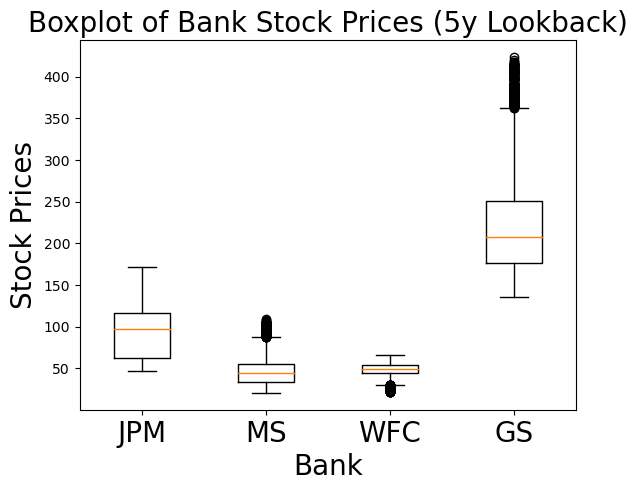

In [27]:
plt.boxplot(bank_data)
plt.title('Boxplot of Bank Stock Prices (5y Lookback)', fontsize = 20)
plt.xlabel('Bank', fontsize = 20)
plt.ylabel('Stock Prices', fontsize = 20)

ticks = range(1, len(bank_data.columns) + 1)
labels = list(bank_data.columns)
plt.xticks(ticks, labels, fontsize = 20)
plt.show()